# Using the MoG simulator

In [23]:
%matplotlib inline
import likelihoodfree.viz as viz
import matplotlib.pyplot as plt
import numpy as np
import seaborn.apionly as sns

from lfmods.mog import MoGSimulator

## Setup the simulator

In [12]:
mog = MoGSimulator(dim=2)

## Sample single theta and many associated data points

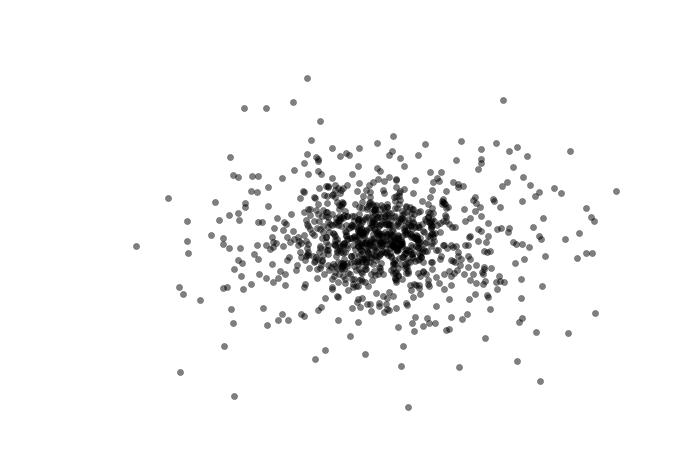

In [21]:
theta = mog.sim_prior(n_samples=1)[0]
samples = mog.forward_model(theta, n_samples=1000)

plt.scatter(samples[:,0], samples[:,1], color='k', edgecolor=None, alpha=0.5)
plt.axis('off')
plt.show()

## Simulate joint distribution

In [ ]:
# TODO: make this work, by allowing the forward model to take multiple samples at a time

n_samples = 10000
n_bins = None
n_bins = int(np.sqrt(n_samples)) if n_bins is None else n_bins

ms, xs = mog.sim_joint(n_samples)

g = sns.jointplot(ms, xs, kind="scatter", size=7, space=0, stat_func=None)

plt.gcf().get_axes()[0].set_xlabel(r'$\theta$')
plt.gcf().get_axes()[0].set_ylabel('x')

## True posterior

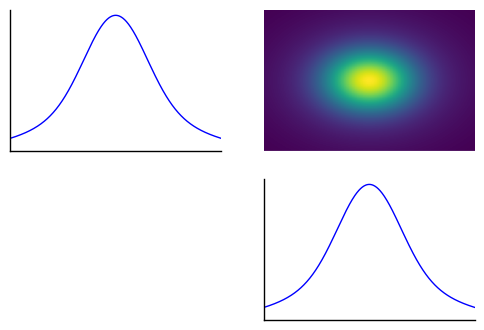

In [28]:
posterior = mog.calc_posterior()
disp_lims = [-3.5, 3.5]
viz.plot_pdf_marginals(pdf=posterior, lims=disp_lims)
plt.show()

## True posterior, marginals only

In [ ]:
# TODO: make this work
posterior = mog.calc_posterior()
disp_lims = [-3.5, 3.5]
viz.plot_pdf_marginals(pdf=posterior, lims=disp_lims, diag_only=True)
plt.show()